In [1]:
import numpy as np # linear algebra
import geopandas as gpd
from geodatasets import get_path
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from ipywidgets import widgets

import pandas as pd
pd.set_option('display.max_columns', 200)

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
data = pd.read_csv('C:\\Users\\rafco\\Desktop\\pythonreports\\covid_africa.csv')

In [10]:
data.describe(include = 'all')

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,latitude,longitude
count,53,5.300000e+01,53.000000,5.100000e+01,51.000000,53.000000,53.000000,5.000000e+01,50.000000,5.300000e+01,53.000000,53.000000
unique,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.104476e+05,4307.490566,2.068947e+05,6351.470588,25723.792453,272.264151,2.084643e+06,162399.900000,2.628029e+07,2.245472,17.517179
std,NaN,5.801757e+05,14382.786439,5.678707e+05,17826.030092,73650.117813,440.961849,4.215405e+06,221402.770638,3.788367e+07,15.374187,20.351722
min,NaN,6.597000e+03,38.000000,4.874000e+03,0.000000,381.000000,3.000000,2.369300e+04,5093.000000,9.942600e+04,-30.559500,-23.041800
25%,NaN,2.205600e+04,290.000000,1.985550e+04,27.000000,2342.000000,33.000000,3.462602e+05,28279.250000,2.633874e+06,-6.369000,0.824800
50%,NaN,6.371500e+04,997.000000,6.247100e+04,309.000000,4659.000000,86.000000,7.325080e+05,60901.000000,1.386569e+07,6.611100,18.732200
75%,NaN,1.718290e+05,2801.000000,1.686770e+05,1752.500000,15990.000000,209.000000,1.958117e+06,209940.500000,3.239545e+07,12.238300,31.465900


In [11]:
geometry = gpd.points_from_xy(data.longitude, data.latitude)
geo_data = gpd.GeoDataFrame(data, geometry = geometry)

C:\Users\rafco\AppData\Local\Temp\ipykernel_7292\3503782840.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


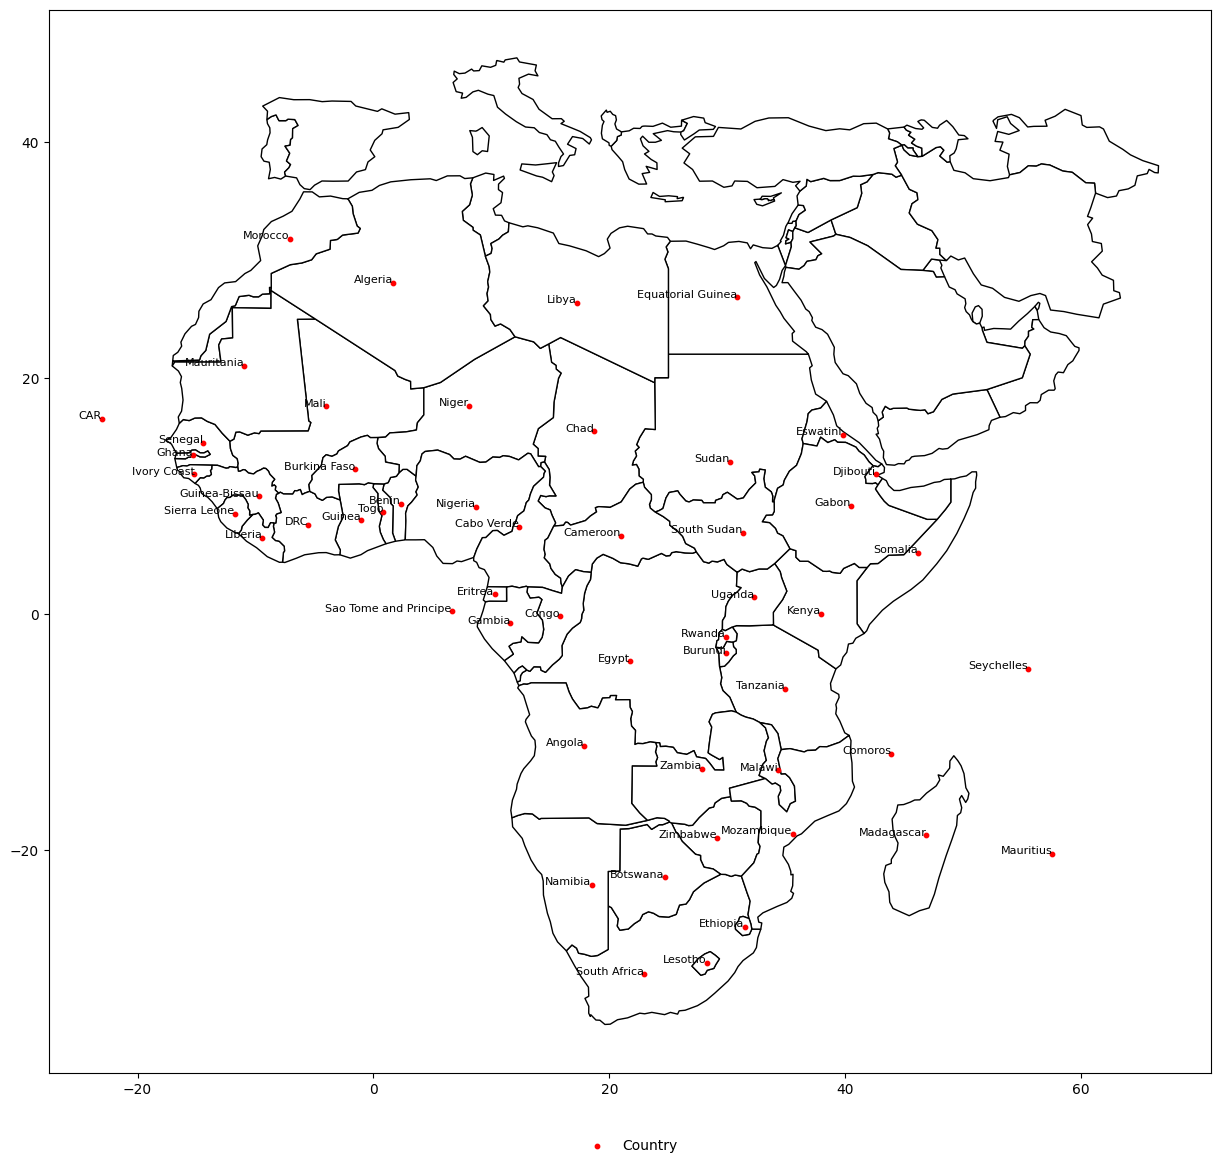

In [21]:
# Leer el archivo naturalearth.land para obtener datos del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crear un recorte para África
bbox_africa = [-20, -40, 60, 40]  # Borde de África (aproximado)

# Filtrar el mapa para África
africa = world.cx[bbox_africa[0]:bbox_africa[2], bbox_africa[1]:bbox_africa[3]]

# Leer los datos de los países africanos desde el archivo CSV
geo_data = pd.read_csv('covid_africa.csv')

# Crear un GeoDataFrame a partir de los datos de latitud y longitud
gdf = gpd.GeoDataFrame(
    geo_data, geometry=gpd.points_from_xy(geo_data.longitude, geo_data.latitude))

# Configurar el sistema de coordenadas
gdf = gdf.set_crs(epsg=4326)

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plotear el mapa de África
africa.plot(ax=ax, color='white', edgecolor='black')

# Agregar los puntos de los países
gdf.plot(ax=ax, color='red', markersize=10, label='Country')

# Agregar etiquetas de países
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Country/Other']):
    ax.text(x, y, label, fontsize=8, ha='right')

# Configurar la leyenda de forma horizontal
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False)

# Mostrar el mapa
plt.show()